# DEMONSTRAÇÃO DAS PRINCIPAIS FUNÇÕES DE ParseTimebankPT

### Instancia TimebankPT

In [1]:
from parse.ParseTimebankPT import TimebankPT, RelacaoTemporal

#tipo de dados
   # train*
   # test
tipo_dados = 'train*'

path_tml = fr'TimeBankPT\{tipo_dados}\*.tml'
tb = TimebankPT(path_tml)

dev = tb.train_test(path_tml).upper()
print(tb)
print('\nDADOS:', dev)

SEQUÊNCIA PIPELINE: PORTUGUÊS
   1 -> tok2vec
   2 -> morphologizer
   3 -> parser
   4 -> attribute_ruler
   5 -> lemmatizer
   6 -> ner
   7 -> pipe_timebankpt
   8 -> merge_entities


QUANTIDADES:
   . Sentenças: 2258
   . Documentos: 162
   . Events: 6790
   . Timex3: 1244
   . TLink: 5781

DADOS: TRAIN*


### Regras para identificação de relações temporais

In [2]:
rt = RelacaoTemporal(tb)

#[código, tipo de relação, ordem de execução, expressão lógica que representa a regra]
#ORD COM NÚM NEGATIVO TORNA A REGRA INATIVA
rt.rules = [
    [271,    "OVERLAP",     1, "self.f.is_dependencyType(tokenE, tokenT, 'nsubj') and self.f.followedBy(tokenT, tokenE)"],
    [237,    "AFTER",       3, "self.f.is_dependencyType(tokenE, tokenT, 'advcl')"],
    [183,    "AFTER",       4, "( self.f.tenseVerb(tokenE, 'Past') or self.f.morph(tokenE, ('VerbForm', 'Part')) )  and ( self.f.hasWordInContextPrecede(tokenE, ['anterior'], 10) or self.f.hasWordInContextFollow(tokenE, ['anterior'], 10) )"],
    [166,    "OVERLAP",     5, "self.f.verbGerundio(tokenE) and self.f.dep(tokenE, 'advcl') and self.f.dep(tokenT, ['obl', 'nmod'])"],
    [115,    "OVERLAP",     6, "self.f.tenseVerb(tokenE, 'Fut') and self.f.hasWordInBetween(tokenE, tokenT, 'para') and self.f.hasNoVerbInBetween(tokenE, tokenT)"], 
    [108,    "OVERLAP",     7, "self.f.search(['começar'], tokenE)"],  
    [101,    "OVERLAP",     8, "self.f.hasWordInContextPrecede(tokenE, ['quando', 'em que'])"],   
    [98,     "OVERLAP",     9, "self.f.search(['começou', 'começado', 'iniciou', 'iniciado'], tokenE) and self.f.closelyFollowing(tokenE, tokenT)"],
    [97,     "OVERLAP",    10, "self.f.hasWordInContextPrecede(tokenT, ['iniciar', 'começar'], lemma=True) and (self.f.hasWordInContextPrecede(tokenE, ['através', 'pelo'], lemma=True) or self.f.hasWordInContextPrecede(tokenE, ['de', 'do', 'da', 'até', 'à', 'durante']))"],  
    [92,     "BEFORE",     11, "self.f.hasWordInContextPrecede(tokenE, 'então')"],  
    [24,     "OVERLAP",    12, "self.f.morph(tokenE, ('VerbForm', 'Inf')) and self.f.pos(tokenT, 'Noun') and self.f.hasWordInContextFollow(tokenE, tokenT.text)"],  
    [9,      "OVERLAP",    13, "self.f.search(['hoje', 'atualmente'], tokenT, lemma = True) and self.f.tenseVerb(tokenE, 'PAST') and self.f.closelyFollowing(tokenE, tokenT)"],
    [150,    "OVERLAP",    15, "self.f.followedBy(tokenT, ['para','a'], 5) and self.f.followedBy(tokenT, tokenE, 10)"],
    [278,    "OVERLAP",    22, "self.f.is_dependencyType(tokenE, tokenT, 'amod') and self.f.tipo(tokenT, ['DATE', 'TIME']) and self.f.morph(tokenE, ('Tense', '')) and self.f.classe(tokenE, ['OCCURRENCE', 'STATE'])"],
    [189,    "OVERLAP",    24, "self.f.tipo(tokenT, ['DURATION']) and self.f.classe(tokenE, ['OCCURRENCE']) and self.f.closelyFollowing(tokenE, tokenT, 15)"],  
    [107,    "OVERLAP",    25, "self.f.classe(tokenE, ['OCCURRENCE']) and self.f.hasDepInContextPrecede(tokenT, 'cc', 5) and self.f.tipo(tokenT, ['DURATION'])"], 
    [90,     "AFTER",      26, "self.f.search('ontem', tokenT.text) and self.f.tenseVerb(tokenE, 'Fut')"],
    [39,     "OVERLAP",    27, "( self.f.hasWordInContextFollow(tokenE, 'antes') or self.f.hasWordInContextPrecede(tokenT, 'antes') ) and not self.f.tenseVerb(tokenE, 'Fut') and self.f.hasNoVerbInBetween(tokenE, tokenT)"], 
    [202,    "OVERLAP",    28, "self.f.tipo(tokenT, ['DURATION']) and self.f.classe(tokenE, ['OCCURRENCE']) and self.f.hasNoVerbInBetween(tokenE, tokenT)"],
    [201,    "OVERLAP",    29, "self.f.tipo(tokenT, ['DURATION']) and self.f.classe(tokenE, ['OCCURRENCE']) and ( self.f.followedBy(tokenE, tokenT, 5) or self.f.followedBy(tokenT, tokenE, 5) )"], 
    [199,    "OVERLAP",    30, "self.f.classe(tokenE, ['REPORTING']) and self.f.tipo(tokenT, ['DURATION']) and self.f.hasWordInContextPrecede(tokenT, ['no', 'em'])"],   
    [197,    "OVERLAP",    31, "self.f.tipo(tokenT, ['TIME']) and self.f.classe(tokenE, ['STATE']) and ( self.f.precededBy(tokenT, tokenE, 2) or self.f.followedBy(tokenT, tokenE, 2) )"],
    [137,    "OVERLAP",    32, "self.f.tipo(tokenT, ['TIME']) and self.f.precededBy(tokenT, 'str', ['em', 'no', 'na']) and self.f.hasNoVerbInBetween(tokenE, tokenT) and self.f.closelyFollowing(tokenE, tokenT, 10)"],    
    [171,    "OVERLAP",    33, "self.f.tipo(tokenT, ['DATE']) and self.f.classe(tokenE, ['STATE']) and self.f.search(['agora', 'atualmente'], tokenT.text) and self.f.precededBy(tokenT, 'token', tokenE)"],    
    [141,    "OVERLAP",    34, "self.f.tipo(tokenT, ['DURATION']) and self.f.classe(tokenE, ['OCCURRENCE']) and self.f.hasWordInContextFollow(tokenT, tokenE.text, 10)"],    
    [139,    "OVERLAP",    35, "self.f.tipo(tokenT, ['DURATION']) and self.f.hasWordInBetween(tokenE, tokenT, ['durante', 'para']) and self.f.hasNoVerbInBetween(tokenE, tokenT)"],   
    [138,    "OVERLAP",    36, "self.f.classe(tokenE, ['STATE']) and self.f.tipo(tokenT, ['DATE']) and self.f.hasWordInBetween(tokenE, tokenT, ['em', 'no', 'na']) and self.f.closelyFollowing(tokenE, tokenT, 20) and self.f.pos(tokenE, ['verb', 'noun']) and not self.f.dep(tokenE, ['obl', 'nummod'])"],  
    [112,    "BEFORE",     37, "self.f.hasWordInContextPrecede(tokenT, 'até') and self.f.tenseVerb(tokenE, 'PAST')"],    
    [99,     "AFTER",      38, "self.f.tenseVerb(tokenE, 'Pres') and self.f.tipo(tokenT, ['DATE']) and self.f.hasWordInContextPrecede(tokenT, 'desde')"],    
    [100,    "AFTER",      39, "self.f.tipo(tokenT, ['DURATION']) and self.f.hasWordInContextFollow(tokenT, ['depois', 'após']) and self.f.tenseVerb(tokenE, 'Past')"],
    [196,    "OVERLAP",    40, "self.f.classe(tokenE, ['STATE']) and self.f.tipo(tokenT, ['DURATION']) and self.f.closelyFollowing(tokenE, tokenT, 20) and self.f.pos(tokenE, ['verb', 'noun'])"],
    [140,    "OVERLAP",    41, "self.f.classe(tokenE, ['OCCURRENCE']) and self.f.hasWordInContextFollow(tokenT, tokenE.text) and not self.f.dep(tokenE, ['obl', 'obl:agent', 'acl', 'acl:relcl', 'conj'])"],  
    [172,    "OVERLAP",    42, "self.f.classe(tokenE, ['STATE']) and self.f.closelyFollowing(tokenE, tokenT, 20) and self.f.pos(tokenE, ['NOUN', 'VERB']) "],  
    [111,    "OVERLAP",    43, "self.f.tipo(tokenT, ['DURATION']) and self.f.classe(tokenE, ['REPORTING']) and self.f.tenseVerb(tokenE, 'Pres')"],
    [198,    "OVERLAP",    44, "self.f.tipo(tokenT, ['DURATION']) and self.f.hasWordInContextPrecede(tokenT, ['para', 'durante']) and self.f.closelyFollowing(tokenE, tokenT)"],    
    [110,    "OVERLAP",    45, "self.f.tenseVerb(tokenE, 'Past') and self.f.tipo(tokenT, ['DATE']) and self.f.hasWordInContextPrecede(tokenT, 'durante')"],    
    [89,     "BEFORE",     46, "self.f.hasWordInContextPrecede(tokenT, 'até') and self.f.tipo(tokenT, ['DATE']) and self.f.pos(tokenE.head, ['VERB'])"],
    [34,     "AFTER",      47, "self.f.hasWordInBetween(tokenE, tokenT, 'após') and self.f.closelyFollowing(tokenE, tokenT)"],
    [33,     "AFTER",      48, "self.f.search('ontem', tokenT.text) and self.f.tenseVerb(tokenE, 'Pres')"],  
    [187,    "OVERLAP",    50, "self.f.tipo(tokenT, ['DURATION']) and ( self.f.hasWordInContextPrecede(tokenT, ['para', 'durante']) or self.f.hasWordInContextFollow(tokenE, ['para', 'durante']) ) and self.f.closelyFollowing(tokenE, tokenT)"],  
    [31,     "AFTER",      51, "self.f.tipo(tokenT, ['DATE']) and self.f.tenseVerb(tokenE, ['Past']) and self.f.hasWordInContextPrecede(tokenT, ['em'], 1) and self.f.tenseVerb(tokenE.head, ['Past'])"],    
]

rt.task = 'A'

#Cod Regras ordenadas por acurácia. Processada individualmente por rt.sort_rules_accuracy() no conjunto de treino. Alto custo computacional.
sort_rules_accuracy = [271, 92, 112, 98, 108, 183, 199, 197, 99, 9, 171, 100, 137, 115, 90, 97, 278, 198, 187, 39, 139, 196, 138, 140, 202, 111, 89, 201, 172, 150, 141, 237, 107, 110, 189, 31, 24, 166, 34, 101, 33]
rt.sort_rules(sort_rules_accuracy)

#Outra ordem para a execução das regras
#rt.sort_rules('codigo_regra', reverse = False)   # 'codigo_regra', 'tipo_relacao', 'ordem', 'random'

In [3]:
#PROCESSA TODAS SENTENÇAS QUE PARTICIPA DA TASK 'A'

print('TIPO DADOS:', dev.upper())

#Melhor configuração
rt.processing_type = 'peneira'  # 'peneira' OR 'votacao'
rt.active_tlink_transitive = False
rt.active_tlink_candidate  = True
rt.tlink_candidate.approach = 'ML'  # 'REGRAS_TREE', 'ML' or 'REGRAS'
rt.tlink_candidate.threshold = 0.3

#processa todas as sentenças da task 'A'
rt.process_rules()

#Resumo do processamento
rt.process_resume()
rt.status()

TIPO DADOS: TRAIN*
RESUMO RELAÇÕES:
Apenas Anotadas:   374.0 de   523.0 (71.5%)
Total Extras:                 531.0
Acurácia:          374.0 de  1054.0 (35.5%)

COBERTURA:         523.0 de 1,440.0 (36.3%)

Quant Regras Processadas:  41
Total Sentenças Task A:   645
Total Relações Anotadas Task A:  1440


STATUS PROCESSAMENTO:
Task:                       A
Quant. Regras Ativas:       41
Tipo Processamento:         peneira
Ordenada por:               lista
Ordem reversa:              False
Tlink Transitivo Ativo?     False
Tlink Candidato Ativo?      True
Tlink Candidato Approach:   ML
Tlink Candidato Threshold:  0.3
Regras processadas?         SIM




              precision    recall  f1-score   support

                  0.000     0.000     0.000       531
       AFTER      0.361     0.303     0.330        99
      BEFORE      0.405     0.400     0.402        85
     OVERLAP      0.349     0.931     0.508       333
       VAGUE      0.000     0.000     0.000         6

    accuracy                          0.355      1054
   macro avg      0.223     0.327     0.248      1054
weighted avg      0.177     0.355     0.224      1054



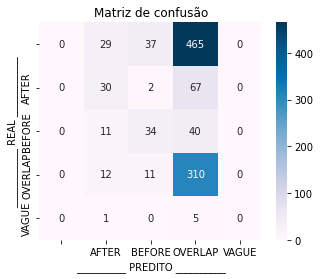

In [4]:
#Matriz de confusão do resultado
rt.cm()

In [5]:
#RESULTADO POR REGRAS
rt.df_resultado_por_regras.sort_index()

Resultado                Erros  Acertos  Total  Extras  pct_acerto
task rule  relType_pred                                           
A    9.0   OVERLAP         2.0     12.0   14.0     5.0       63.16
     24.0  OVERLAP         2.0      8.0   10.0    20.0       26.67
     31.0  AFTER          19.0     13.0   32.0    14.0       28.26
     33.0  AFTER           0.0      0.0    0.0     2.0        0.00
     34.0  AFTER           0.0      0.0    0.0     3.0        0.00
     39.0  OVERLAP         0.0      3.0    3.0     4.0       42.86
     89.0  BEFORE         13.0     17.0   30.0    31.0       27.87
     90.0  AFTER           0.0      1.0    1.0     1.0       50.00
     92.0  BEFORE          0.0      1.0    1.0     0.0      100.00
     97.0  OVERLAP         0.0      2.0    2.0     6.0       25.00
     98.0  OVERLAP         3.0      8.0   11.0     0.0       72.73
     99.0  AFTER           0.0      2.0    2.0     1.0       66.67
     100.0 AFTER           1.0      3.0    4.0     2.0       50.00
     101.0 OVERLAP         2.0      3.0    5.0    13.0       16.67
     107.0 OVERLAP         2.0      0.0    2.0     2.0        0.00
     108.0 OVERLAP         2.0      7.0    9.0     1.0       70.00
     110.0 OVERLAP         6.0      5.0   11.0     7.0       27.78
     111.0 OVERLAP         5.0      2.0    7.0     1.0       25.00
     112.0 BEFORE          0.0     16.0   16.0     6.0       72.73
     115.0 OVERLAP         0.0      1.0    1.0     1.0       50.00
     137.0 OVERLAP         5.0     13.0   18.0     7.0       52.00
     138.0 OVERLAP         5.0     28.0   33.0    37.0       40.00
     139.0 OVERLAP         0.0      2.0    2.0     6.0       25.00
     140.0 OVERLAP        19.0     65.0   84.0    64.0       43.92
     141.0 OVERLAP         0.0      0.0    0.0     6.0        0.00
     150.0 OVERLAP        17.0     33.0   50.0    53.0       32.04
     166.0 OVERLAP         6.0      3.0    9.0    15.0       12.50
     171.0 OVERLAP         1.0      3.0    4.0     1.0       60.00
     172.0 OVERLAP         9.0     30.0   39.0    91.0       23.08
     183.0 AFTER           1.0      4.0    5.0     1.0       66.67
     187.0 OVERLAP         5.0      7.0   12.0     6.0       38.89
     189.0 OVERLAP         5.0      5.0   10.0    24.0       14.71
     196.0 OVERLAP         1.0      9.0   10.0    19.0       31.03
     197.0 OVERLAP         0.0      2.0    2.0     1.0       66.67
     198.0 OVERLAP        11.0     27.0   38.0    24.0       43.55
     199.0 OVERLAP         1.0      2.0    3.0     0.0       66.67
     201.0 OVERLAP         1.0      2.0    3.0     5.0       25.00
     202.0 OVERLAP         2.0     21.0   23.0    40.0       33.33
     237.0 AFTER           3.0      7.0   10.0     5.0       46.67
     271.0 OVERLAP         0.0      3.0    3.0     1.0       75.00
     278.0 OVERLAP         0.0      4.0    4.0     5.0       44.44

In [6]:
#RESULTADO POR CLASSE
rt.df_resultado_por_classe

Resultado          Erros  Acertos  Total  Extras  pct_acerto
task relType_pred                                           
A    BEFORE           13       34     47      37       40.48
     AFTER            24       30     54      29       36.14
     OVERLAP         112      310    422     465       34.95

In [7]:
#RESULTADO POR TASK
rt.df_resultado_por_task

Resultado,Erros,Acertos,Total,Extras,pct_acerto
task,,,,,
A,149,374,523,531,35.48


### Analisar Regra

In [8]:
#ENTRA COM COD DA REGRA QUE SERÁ ANALIZADA
rule = 98

In [9]:
#Relações que a regra acertou
df_acertou = rt.df_real_predict.query('rule == ' + str(rule) + ' and acertou == True')
df_acertou

,lid_real,doc,isentenca,task,relType_real,relType_real_sem_OR,eventID,text_event,relatedTo,text_relatedTo,value,relType_pred,rule,acertou
97,l13,APW19980219.0476,233,A,OVERLAP,OVERLAP,e95,começou,t143,meados de 1996,1996,OVERLAP,98.0,True
189,l17,NYT19980206.0460,431,A,OVERLAP,OVERLAP,e72,começou,t204,outono passado,1997-FA,OVERLAP,98.0,True
269,l8,WSJ910225-0066,633,A,OVERLAP,OVERLAP,e284,começou,t508,agosto passado,1990-08,OVERLAP,98.0,True
436,l3,wsj_0187,879,A,OVERLAP,OVERLAP,e32,começou,t36,terça-feira,1989-10-31,OVERLAP,98.0,True
687,l27,wsj_0570,1127,A,OVERLAP,OVERLAP,e52,começou,t108,julho,1989-07,OVERLAP,98.0,True
964,l3,wsj_0781,1580,A,OVERLAP,OVERLAP,e24,começou,t280,sexta-feira,1989-10-27,OVERLAP,98.0,True
979,l18,wsj_0781,1601,A,OVERLAP,OVERLAP,e122,começou,t287,final de setembro,1989-09,OVERLAP,98.0,True
1168,l2,wsj_1011,1904,A,OVERLAP,OVERLAP,e13,começou,t60,última primavera,1988-SP,OVERLAP,98.0,True


In [10]:
#Relações que a regra errou
df_errou   = rt.df_real_predict_extra.query('rule == ' + str(rule) + ' and acertou == False')
df_errou

,lid_real,doc,isentenca,task,relType_real,relType_real_sem_OR,eventID,text_event,relatedTo,text_relatedTo,value,relType_pred,rule,acertou
188,l16,NYT19980206.0460,431,A,BEFORE,BEFORE,e72,começou,t203,janeiro,1998-01,OVERLAP,98.0,False
1238,l11,wsj_1025,1978,A,VAGUE,VAGUE,e43,começou,t40,segundo trimestre,XXXX-Q2,OVERLAP,98.0,False
1239,l12,wsj_1025,1978,A,VAGUE,VAGUE,e43,começou,t41,quarto,XXXX-Q4,OVERLAP,98.0,False


### Analisar Sentença

In [11]:
#ENTRE COM COD SENTENÇA QUE SERÁ ANALIZADA
tb.id_sentenca = 431

#todas sentenças que acertou alguma relação
#tb.id_sentenca = df_acertou.isentenca.tolist()   

print(tb.sentenca_texto)
tb.print.ent()

['Os números de emprego para janeiro continuaram uma onda de aumento de empregos que começou no outono passado, exactamente quando o mercado de trabalho tinha mostrado sinais de arrefecimento.']


-------------------------------------------------------------------
DCT: 1998-02-06T22:19:00   DOC: NYT19980206.0460   ID_SENTENCA: 431 



In [12]:
##DESCRIÇÃO DA REGRA QEU ESTÁ SENDO ANALISADA
rt.get_rules(rule)

[[98,
  'OVERLAP',
  9,
  "self.f.search(['começou', 'começado', 'iniciou', 'iniciado'], tokenE) and self.f.closelyFollowing(tokenE, tokenT)"]]

In [13]:
#Lista das Relações da sentença 
cols = ['relType_real', 'text_event', 'text_relatedTo', 'acertou']
df_acertou.query('isentenca in ' + str(tb.id_sentenca))[cols].append(df_errou.query('isentenca in ' + str(tb.id_sentenca))[cols])


,relType_real,text_event,text_relatedTo,acertou
189,OVERLAP,começou,outono passado,True
188,BEFORE,começou,janeiro,False


#### Recursos Utilizados na Sentença

In [14]:
tb.print.morph()


-------------------------------------------------------------------
DCT: 1998-02-06T22:19:00   DOC: NYT19980206.0460   ID_SENTENCA: 431 
Os números de emprego para janeiro continuaram uma onda de aumento de empregos que começou no outono passado, exactamente quando o mercado de trabalho tinha mostrado sinais de arrefecimento.

  i  Token           ENT     POS    Desc POS     PAI             POS PAI    DEP        Desc Dep                                                                Morph
---  --------------  ------  -----  -----------  --------------  ---------  ---------  ----------------------------------------------------------------------  -----------------------------------------------------
  0  Os                      DET    determiner   números         NOUN       det        determiner                                                              Definite=Def|Gender=Masc|Number=Plur|PronType=Art
  1  números                 NOUN   noun         continuaram     VERB       nsubj  

In [15]:
tb.print.timebank()


-------------------------------------------------------------------
DCT: 1998-02-06T22:19:00   DOC: NYT19980206.0460   ID_SENTENCA: 431 
Os números de emprego para janeiro continuaram uma onda de aumento de empregos que começou no outono passado, exactamente quando o mercado de trabalho tinha mostrado sinais de arrefecimento.

  i  Token           ENT     POS    Desc POS     PAI             POS PAI    DEP        id_sentenca    id_tag    classe      aspecto    tempo    pos    tipo    valor
---  --------------  ------  -----  -----------  --------------  ---------  ---------  -------------  --------  ----------  ---------  -------  -----  ------  -------
  0  Os                      DET    determiner   números         NOUN       det
  1  números                 NOUN   noun         continuaram     VERB       nsubj
  2  de                      ADP    adposition   emprego         NOUN       case
  3  emprego                 NOUN   noun         números         NOUN       nmod
  4  para     

In [16]:
tb.print.graph()


-------------------------------------------------------------------
DCT: 1998-02-06T22:19:00   DOC: NYT19980206.0460   ID_SENTENCA: 431 
Os números de emprego para janeiro continuaram uma onda de aumento de empregos que começou no outono passado, exactamente quando o mercado de trabalho tinha mostrado sinais de arrefecimento.



In [17]:
tb.print.graph_dfs()


-------------------------------------------------------------------
DCT: 1998-02-06T22:19:00   DOC: NYT19980206.0460   ID_SENTENCA: 431 
Os números de emprego para janeiro continuaram uma onda de aumento de empregos que começou no outono passado, exactamente quando o mercado de trabalho tinha mostrado sinais de arrefecimento.

 6.  continuaram:ROOT     								| VERB	EVENT	ASPECTUAL		Mood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin
  |	 1.  números:nsubj        							| NOUN				Gender=Masc|Number=Plur
  |	  |	 0.  Os:det               						| DET				Definite=Def|Gender=Masc|Number=Plur|PronType=Art
  |	  |	 3.  emprego:nmod         						| NOUN				Gender=Masc|Number=Sing
  |	  |	  |	 2.  de:case              					| ADP				
  |	  |	  |	 5.  janeiro:nmod         					| NOUN	TIMEX3		DATE	Gender=Masc|Number=Sing
  |	  |	  |	  |	 4.  para:case            				| ADP				
  |	 8.  onda:obj             							| NOUN	EVENT	OCCURRENCE		Gender=Fem|Number=Sing
  |	  |	 7.  uma:det             

In [18]:
# Lista de sentenças que participam da task A
print(tb.id_sentencas_task('A'))

[3, 29, 30, 34, 40, 55, 67, 74, 75, 77, 79, 82, 83, 85, 89, 90, 91, 96, 99, 102, 107, 109, 115, 116, 126, 129, 133, 134, 135, 136, 149, 150, 151, 182, 184, 190, 192, 193, 197, 199, 200, 206, 208, 216, 217, 222, 226, 230, 231, 233, 236, 242, 251, 253, 264, 265, 270, 282, 287, 291, 292, 302, 306, 308, 314, 318, 325, 332, 339, 340, 342, 358, 363, 365, 369, 372, 374, 380, 383, 384, 385, 387, 389, 404, 405, 409, 411, 414, 415, 416, 417, 418, 420, 423, 425, 426, 431, 436, 438, 443, 450, 456, 459, 465, 466, 473, 477, 488, 494, 507, 508, 518, 526, 528, 530, 532, 535, 536, 537, 543, 550, 554, 560, 561, 574, 576, 580, 581, 587, 601, 602, 624, 633, 634, 635, 636, 642, 643, 661, 669, 674, 676, 677, 685, 686, 689, 692, 695, 697, 699, 700, 702, 704, 705, 708, 709, 710, 712, 716, 717, 719, 720, 721, 722, 723, 727, 728, 730, 731, 732, 733, 734, 736, 738, 747, 748, 752, 753, 761, 762, 768, 774, 784, 787, 788, 792, 793, 795, 797, 813, 819, 822, 823, 825, 827, 829, 832, 834, 844, 847, 848, 849, 851, 852,